In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
weight = 0.5
bias = 0.2

start = 0
end = 3
step = 0.02
data = torch.arange(start, end, step).unsqueeze(dim=1)
split = int(0.8 * len(data))
y = weight * data + bias
X_train, Y_train = data[:split], y[:split]
X_test, Y_test = data[split:], y[split:]

In [5]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(120, 120, 30, 30)

In [23]:
def plot_pred(xtr=X_train, ytr=Y_train, xts=X_test, yts=Y_test, pred=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(xtr, ytr, c="green", s=4, label="Train data")
    plt.scatter(xts, yts, c="red", s=4, label="Test data")
    if pred is not None:
        plt.scatter(xts, pred, c="orange", s=4, label="Predictions")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend()

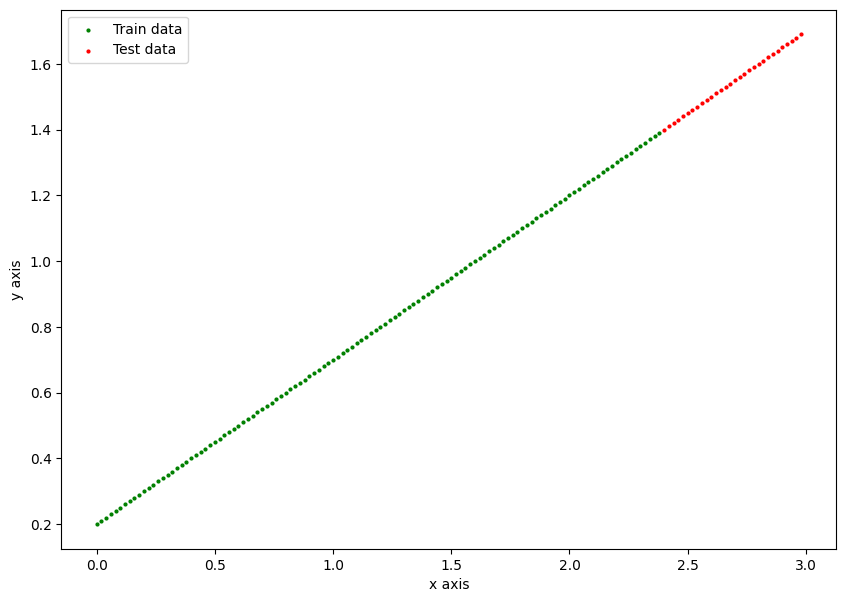

In [30]:
plot_pred()

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # 1 input node, 1 output node

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [13]:
torch.manual_seed(10)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRgressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.0838]])),
              ('linear_layer.bias', tensor([-0.0343]))]))

In [19]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
loss_fn = nn.L1Loss()

In [21]:
epochs = 100

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, Y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.9048843383789062 | Test loss: 1.7207695245742798
Epoch: 10 | Loss: 0.6632744073867798 | Test loss: 1.300659418106079
Epoch: 20 | Loss: 0.42166435718536377 | Test loss: 0.880549430847168
Epoch: 30 | Loss: 0.1985863298177719 | Test loss: 0.47445204854011536
Epoch: 40 | Loss: 0.06932384520769119 | Test loss: 0.16727618873119354
Epoch: 50 | Loss: 0.04452810809016228 | Test loss: 0.07703208923339844
Epoch: 60 | Loss: 0.0319472998380661 | Test loss: 0.05361972376704216
Epoch: 70 | Loss: 0.019376792013645172 | Test loss: 0.031921520829200745
Epoch: 80 | Loss: 0.006809977814555168 | Test loss: 0.009375246241688728
Epoch: 90 | Loss: 0.008736568503081799 | Test loss: 0.023253556340932846


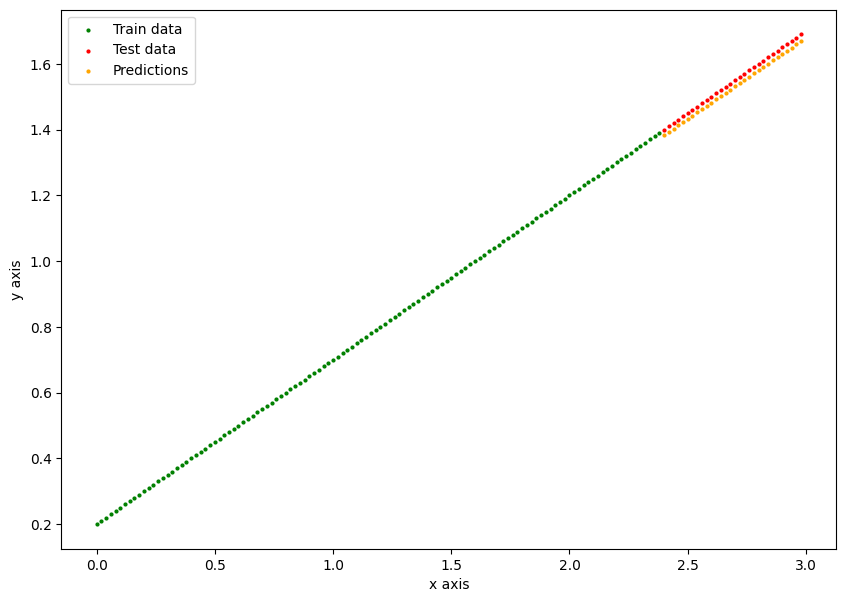

In [29]:
plot_pred(pred=test_preds)

In [31]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4933]])),
             ('linear_layer.bias', tensor([0.1992]))])

In [33]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

y_pred[:10] 

tensor([[0.2092],
        [0.2193],
        [0.2294],
        [0.2395],
        [0.2496],
        [0.2597],
        [0.2698],
        [0.2799],
        [0.2900],
        [0.3002]], grad_fn=<SliceBackward0>)

In [35]:
from pathlib import Path

path = Path("models")
filepath = path / "02_pytorch_workflow.pth"
torch.save(model.state_dict(), filepath)

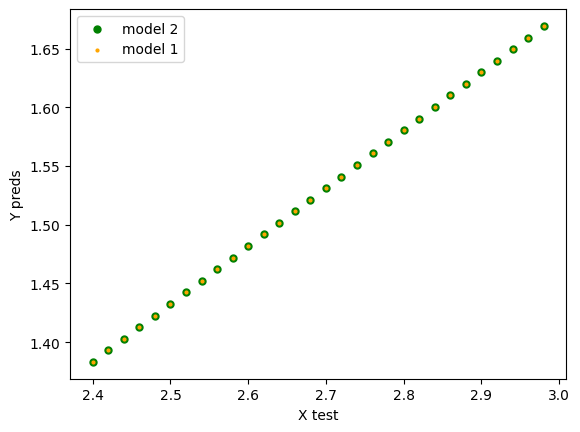

In [43]:
model2 = LinearRegressionModel()
params = torch.load(filepath)
model2.load_state_dict(params)

model2.eval()
with torch.inference_mode():
    y_preds1 = model2(X_test)

model.eval()
with torch.inference_mode():
    y_preds2 = model(X_test)

plt.scatter(X_test, y_preds1, c="green", s=25, label="model 2")
plt.scatter(X_test, y_preds2, c="orange", s=4, label="model 1")
plt.xlabel("X test")
plt.ylabel("Y preds")
plt.legend()
plt.show()      